## Sistemas de Inteligencia Artificial
### TP0: Introducción al Análisis de Datos
###### Primer Cuatrimestre 2023
#### Introducción

El objetivo de este TP es evaluar una función que depende de varios parámetros de entrada, fundamentando las conclusiones con gráficos pertinentes y explicando la metodología utilizada para llegar a cada una. Para ello será provisto un código fuente que incluye una implementación de dicha función junto con ejemplos de ejecución.
#### Función a Evaluar
La función a evaluar es la de captura de un Pokemon, consistente en dos parámetros de entrada: el Pokemon que se está intentando capturar y el tipo de pokebola que se pretende utilizar. La misma retorna un valor booleano correspondiente al resultado del intento de captura.
El éxito de la captura depende del estado en el que se encuentre el Pokemon y del tipo de pokebola que se utilice. Además, algunos Pokemones son intrínsecamente más fáciles de capturar que otros. Para evaluar la función correctamente se deberan probar varias configuraciones de entrada y analizar los resultados correspondientes.
#### Contexto
Pokemon es una franquicia de videojuegos donde el jugador se dedica a armar un pequeño equipo de monstruos (llamados pokemones), entrenarlos peleando contra otros pokemones con el objetivo de convertirse en el mejor entrenador de pokemones de la región. Para conseguir estos pokemones el jugador tiene que explorar el medio salvaje donde estos habitan, pelear contra ellos y finalmente capturarlos utilizando herramientas particulares llamadas pokebolas.
#### Archivos Provistos
Toda la implementación provista se encuentra hecha en Python y contiene lo necesario para poder ejecutar la función y evaluar sus resultados.
### pokemon.py
Modelo de un Pokemon y la implementación de un PokemonFactory para generar nuevos Pokemones. Cada Pokemon cuenta con propiedades que son constantes e inmutables para todos los miembros de la especie y otras que son mutables y corresponden al estado actual de la instancia.
###### Propiedad Tipo Descripción
* current hp int Vida actual (Min: 0)
* level int Nivel de experiencia (Min: 1, Max: 100)
* status effect Enum(StatusEffect) Condici´on de salud
### pokeball.py
Modelo genérico de una pokebola y la implementación concreta de 4 pokebolas distintas:
“PokeBall”, “UltraBall”, “FastBall” y “HeavyBall”.
### pokemon.json
Archivo con los parámetros inmutables de 5 especies distintas de Pokemones. Cada Pokemon cuenta con las siguientes propiedades inmutables:
###### Propiedad Tipo Descripción
* type string[2] Especie de Pokemon (Ej: [ROCK”, ”FIRE”] o [”FIRE, ”NONE”] )
* stats int[6] [base hp, attack, defense, Sp. attack, Sp. defense, speed]
* wieght float Peso del Pokemon
* catch rate int Dificultad de captura. (Min: 0, Max: 255)

### catching.py
Implementación de la función attempt_catch que es la *función a evaluar*.
* Input: Pokemon a capturar y el tipo de pokebola a utilizar
* Output: un valor de tipo boolean (attempt success) que indica si el Pokemon fue capturado o no y otro valor de tipo float (capture rate) que indica la probabilidad de que el pokemon sea capturado, dependiendo de un valor aleatorio.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

from catching import attempt_catch
from pokemon import PokemonFactory, StatusEffect


### Preguntas Guía
Se desea evaluar qué factores influyen en la captura de un Pokemon teniendo en cuenta los parámetros inmutables del mismo junto con la pokebola utlizada. Para ello se deberán generar distintos gráficos que representen las respuestas a las siguientes preguntas guía:

1. Acerca de pokebolas:
- a) Ejecutando la función 100 veces, para cada Pokemon en condiciones ideales (HP:100 %, LVL 100) ¿Cuál es la probabilidad de captura promedio para cada pokebola?

In [54]:
import json

factory = PokemonFactory("pokemon.json")
with open("pokemon.json", "r") as c:
            pokemon_db = json.load(c) 
pokemons = pokemon_db.keys()

pokemons

dict_keys(['jolteon', 'caterpie', 'snorlax', 'onix', 'mewtwo'])

In [4]:
pokeball_catch_rate = pd.DataFrame(columns=[])
for pokemon_name in pokemons:
    pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, 1)
    for _ in range(100):
        catchT1, valor1 = attempt_catch(pokemon, "pokeball")
        catchT2, valor2 = attempt_catch(pokemon, "ultraball")
        catchT3, valor3 = attempt_catch(pokemon, "fastball")
        catchT4, valor4 = attempt_catch(pokemon, "heavyball")
        new_row = {"pokemon_name": pokemon_name, "hp_percentage":1, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
        pokeball_catch_rate = pd.concat([pokeball_catch_rate, pd.DataFrame([new_row])], ignore_index=True)
        
columnas_numericas = pokeball_catch_rate.select_dtypes(include=['float64'])     
promedios = columnas_numericas.mean()
promedios
#pokeball_catch_rate     #Tiene fijo status y hp

pokeball     0.09714
ultraball    0.19428
fastball     0.13464
heavyball    0.10182
dtype: float64

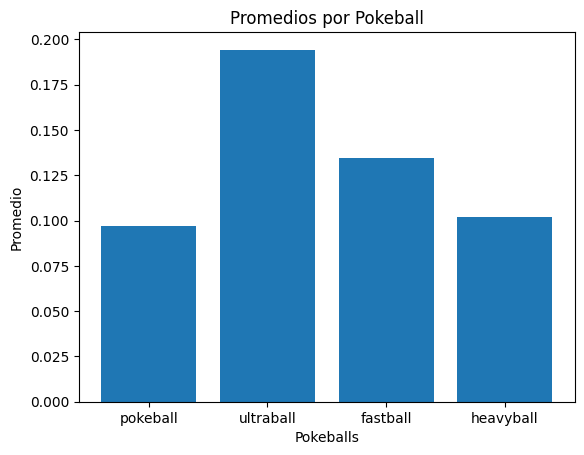

In [5]:
import matplotlib.pyplot as plt
promedios_list = promedios.to_list()
plt.bar(promedios.index, promedios_list)
plt.xlabel('Pokeballs')
plt.ylabel('Promedio')
plt.title('Promedios por Pokeball')
plt.show()

Lo que se observa es que lo general las ultraball tiene mayor promedio de probabilidad de captura.

- b) ¿Es cierto que algunas pokebolas son más o menos efectivas dependiendo de propiedades intrínsecas de cada Pokemon? Justificar.
Sugerencia: Comparar efectividad (success/total attemps) como proporción de la efectividad de la Pokebola básica para cada Pokemon

In [6]:
# Filtrar las columnas relevantes
columnas_capturado = pokeball_catch_rate[['pokemon_name', 'Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']]

# Contar los valores True agrupados por nombre de Pokémon
conteo_por_pokemon = ( columnas_capturado.groupby('pokemon_name').sum() )/100

conteo_por_pokemon

,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
pokemon_name,,,,
caterpie,0.37,0.66,0.30,0.30
jolteon,0.06,0.14,0.22,0.02
mewtwo,0.01,0.00,0.04,0.00
onix,0.09,0.16,0.05,0.13
snorlax,0.02,0.08,0.02,0.10


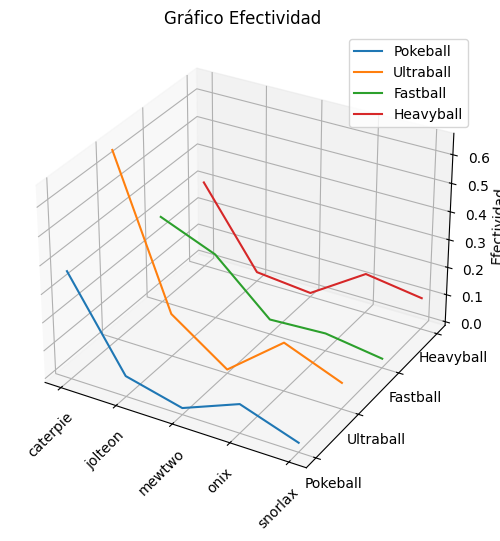

In [7]:
df = pd.DataFrame(conteo_por_pokemon)
# Cambiar nombres de las columnas
nuevos_nombres = {'Capturado_pb': 'Pokeball', 'Capturado_ub': 'Ultraball', 'Capturado_fb': 'Fastball','Capturado_hb': 'Heavyball'}
df = df.rename(columns=nuevos_nombres)

# Crear figura y ejes 3D
fig = plt.figure(figsize=(6, 8))
ax = fig.add_subplot(111, projection='3d')

# Configurar etiquetas de los ejes
x_labels = df.index.tolist()
y_labels = df.columns.tolist()

# Agregar líneas para cada serie de datos
for i, col in enumerate(df.columns):
    ax.plot(range(len(df)), [i] * len(df), df[col], label=col)

# Configurar etiquetas de los ejes
ax.set_xticks(range(len(df)))
ax.set_xticklabels(x_labels, rotation=45)
ax.set_yticks(range(len(df.columns)))
ax.set_yticklabels(y_labels)

# Configurar etiquetas y título
#ax.set_xlabel('Índices')
#ax.set_ylabel('Columnas')
ax.set_zlabel('Efectividad', labelpad=1)
ax.set_title('Gráfico Efectividad')

# Agregar leyenda
ax.legend()

# Mostrar el gráfico
#plt.tight_layout()  # Ajustar el diseño para evitar superposición de elementos
plt.show()



Lo que se observa es que la efectividad de cada tipo de pokebola si depende de cual pokemos queremos capturar, dado que las características intrinsecas de cada pokemos es relevante. No es lo mismo querer capturar un caterpie en diferencia a un mewtwo.

2. Acerca del estado del Pokemon:
- a) ¿Las condiciones de salud tienen algún efecto sobre la efectividad de la captura? Si es así, ¿Cúal es más o menos efectiva?

In [8]:
# Vario el hp_percentage
pokeball_catch_rate2 = pd.DataFrame(columns=[])
for pokemon_name in pokemons:
    for hp in np.arange(0, 1, 0.1):
        pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, hp)
        for _ in range(100):
            catchT1, valor1 = attempt_catch(pokemon, "pokeball")
            catchT2, valor2 = attempt_catch(pokemon, "ultraball")
            catchT3, valor3 = attempt_catch(pokemon, "fastball")
            catchT4, valor4 =attempt_catch(pokemon, "heavyball")
            new_row = {"pokemon_name": pokemon_name, "hp_percentage":hp,"pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
            pokeball_catch_rate2 = pd.concat([pokeball_catch_rate2, pd.DataFrame([new_row])], ignore_index=True)
        
#columnas_numericas2 = pokeball_catch_rate2.select_dtypes(include=['float64'])     
#promedios2 = columnas_numericas2.mean()
#
#pokeball_catch_rate2

In [19]:
# Filtrar las filas con valores True en las columnas de interés
capturado_columns = ['pokemon_name','hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
df_capturado = pokeball_catch_rate2[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result = df_capturado.groupby(['pokemon_name', 'hp_percentage']).sum() / 100
result

Capturado_pb  Capturado_ub  Capturado_fb  \
pokemon_name hp_percentage                                             
caterpie     0.0                    0.99          1.00          1.00   
             0.1                    0.87          1.00          0.94   
             0.2                    0.85          1.00          0.86   
             0.3                    0.81          1.00          0.80   
             0.4                    0.79          1.00          0.62   
             0.5                    0.67          1.00          0.63   
             0.6                    0.61          1.00          0.50   
             0.7                    0.59          1.00          0.52   
             0.8                    0.43          0.95          0.46   
             0.9                    0.44          0.79          0.38   
jolteon      0.0                    0.16          0.34          0.71   
             0.1                    0.17          0.36          0.62   
             0.2                    0.15          0.29          0.64   
             0.3                    0.10          0.33          0.58   
             0.4                    0.12          0.20          0.57   
             0.5                    0.09          0.25          0.50   
             0.6                    0.13          0.21          0.40   
             0.7                    0.06          0.19          0.38   
             0.8                    0.10          0.16          0.35   
             0.9                    0.04          0.13          0.27   
mewtwo       0.0                    0.01          0.02          0.09   
             0.1                    0.01          0.00          0.06   
             0.2                    0.01          0.02          0.04   
             0.3                    0.01          0.02          0.08   
             0.4                    0.00          0.02          0.04   
             0.5                    0.01          0.02          0.03   
             0.6                    0.01          0.00          0.05   
             0.7                    0.00          0.01          0.05   
             0.8                    0.00          0.01          0.01   
             0.9                    0.00          0.00          0.02   
onix         0.0                    0.19          0.40          0.24   
             0.1                    0.13          0.22          0.12   
             0.2                    0.20          0.25          0.11   
             0.3                    0.19          0.26          0.16   
             0.4                    0.15          0.32          0.08   
             0.5                    0.16          0.18          0.14   
             0.6                    0.09          0.18          0.13   
             0.7                    0.11          0.14          0.11   
             0.8                    0.05          0.13          0.07   
             0.9                    0.10          0.12          0.05   
snorlax      0.0                    0.03          0.22          0.10   
             0.1                    0.15          0.19          0.12   
             0.2                    0.08          0.17          0.13   
             0.3                    0.07          0.10          0.11   
             0.4                    0.10          0.15          0.03   
             0.5                    0.05          0.11          0.10   
             0.6                    0.03          0.17          0.05   
             0.7                    0.07          0.09          0.04   
             0.8                    0.05          0.15          0.09   
             0.9                    0.05          0.09          0.06   

                            Capturado_hb  
pokemon_name hp_percentage                
caterpie     0.0                    0.91  
             0.1                    0.80  
             0.2                    0.81  
             0.3                    0.64  
             0.4         

In [22]:
#para hace la grafica, restablezco los indices a columnas
result1 = result.reset_index()
result1

,pokemon_name,hp_percentage,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
0,caterpie,0.0,0.99,1.00,1.00,0.91
1,caterpie,0.1,0.87,1.00,0.94,0.80
2,caterpie,0.2,0.85,1.00,0.86,0.81
3,caterpie,0.3,0.81,1.00,0.80,0.64
4,caterpie,0.4,0.79,1.00,0.62,0.60
5,caterpie,0.5,0.67,1.00,0.63,0.62
6,caterpie,0.6,0.61,1.00,0.50,0.60
7,caterpie,0.7,0.59,1.00,0.52,0.43
8,caterpie,0.8,0.43,0.95,0.46,0.44
9,caterpie,0.9,0.44,0.79,0.38,0.38


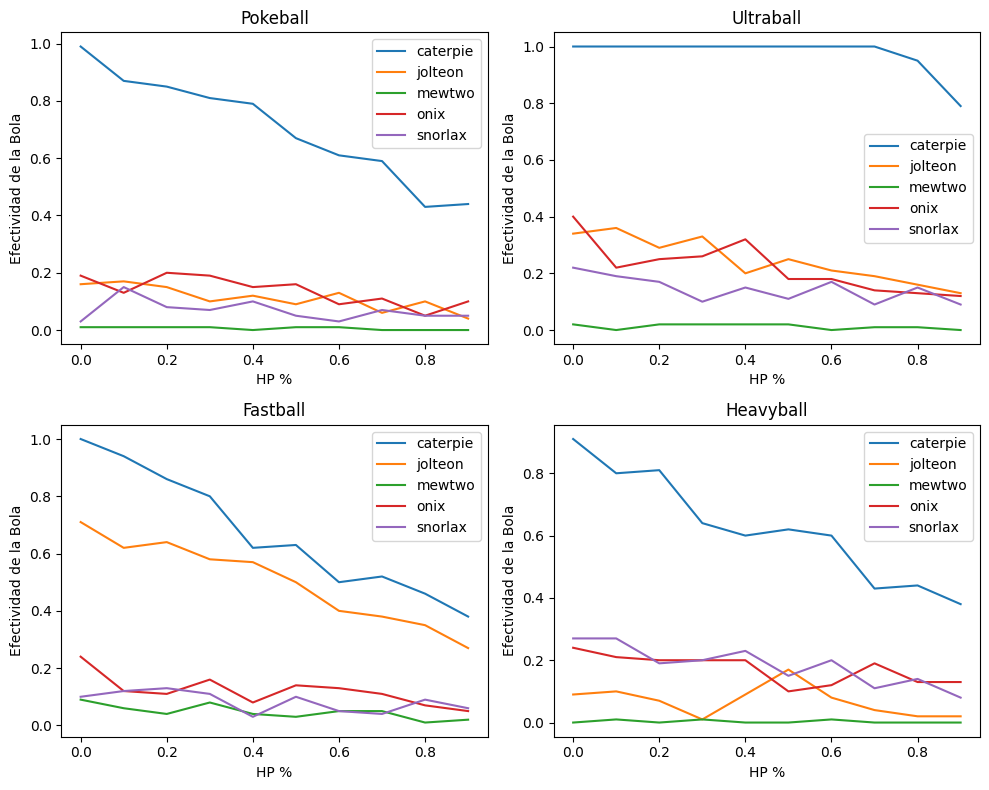

In [28]:
df = pd.DataFrame(result1)
df.rename(columns={'Capturado_pb':'Pokeball',	'Capturado_ub':'Ultraball',	'Capturado_fb':'Fastball',	'Capturado_hb':'Heavyball'}, inplace=True)
#['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']):
    row, col = divmod(i, 2)
    for pokemon in df['pokemon_name'].unique():
        subset = df[df['pokemon_name'] == pokemon]
        axs[row, col].plot(subset['hp_percentage'], subset[ball_type], label=pokemon)
    axs[row, col].set_xlabel('HP %')
    axs[row, col].set_ylabel('Efectividad de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

Lo que se observa es que en en general a medidad que aumenta el Hp % disminuye la efectividad de la bola. Aunque en el caso de la ultrabola sigue siendo medianamente efectiva.

- b) ¿Cómo afectan los puntos de vida a la efectividad de la captura?
Sugerencia: Elegir uno o dos Pokemones y manteniendo el resto de los parámetros constantes, calcular la probabilidad de captura para distintos HP %

- -  caterpie

In [17]:
#vario status y hp_percentage
pokeball_catch_rate4 = pd.DataFrame([])
status = StatusEffect

pokemon_name="caterpie"
for n in np.arange(0,1,0.2):                                            #6
    for hp in np.arange(0, 1, 0.1):                         #10
        pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, hp)       
        for _ in range(100):
            catchT1, valor1 = attempt_catch(pokemon, "pokeball",n)
            catchT2, valor2 = attempt_catch(pokemon, "ultraball",n)
            catchT3, valor3 = attempt_catch(pokemon, "fastball",n)
            catchT4, valor4 =attempt_catch(pokemon, "heavyball",n)
            new_row = {"pokemon_name": pokemon_name, "noise":n, "hp_percentage":hp, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
            pokeball_catch_rate4 = pd.concat([pokeball_catch_rate4, pd.DataFrame([new_row])], ignore_index=True)

# Filtrar las filas con valores True en las columnas de interés
capturado_columns = ['noise', 'hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
df_capturado = pokeball_catch_rate4[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result3 = df_capturado.groupby(['noise', 'hp_percentage']).sum() / 100
#result3
pokeball_catch_rate4


,pokemon_name,noise,hp_percentage,pokeball,Capturado_pb,ultraball,Capturado_ub,fastball,Capturado_fb,heavyball,Capturado_hb
0,caterpie,0.0,0.0,0.990100,True,1.000000,True,0.990100,True,0.912400,False
1,caterpie,0.0,0.0,0.990100,True,1.000000,True,0.990100,True,0.912400,True
2,caterpie,0.0,0.0,0.990100,True,1.000000,True,0.990100,True,0.912400,False
3,caterpie,0.0,0.0,0.990100,True,1.000000,True,0.990100,True,0.912400,True
4,caterpie,0.0,0.0,0.990100,True,1.000000,True,0.990100,True,0.912400,True
...,...,...,...,...,...,...,...,...,...,...,...
4995,caterpie,0.8,0.9,0.419439,True,0.642283,True,0.000000,False,0.097857,False
4996,caterpie,0.8,0.9,0.451230,False,1.000000,True,0.259598,True,0.555494,True
4997,caterpie,0.8,0.9,0.440866,True,0.000000,False,0.507550,True,0.552635,False
4998,caterpie,0.8,0.9,1.000000,True,1.000000,True,0.587090,True,0.000000,False


In [30]:
#para hace la grafica, restablezco los indices a columnas
result3g = result3.reset_index()
result3g

,noise,hp_percentage,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
0,0.0,0.0,0.99,1.00,0.96,0.85
1,0.0,0.1,0.94,1.00,0.95,0.87
2,0.0,0.2,0.82,1.00,0.89,0.81
3,0.0,0.3,0.85,1.00,0.74,0.72
4,0.0,0.4,0.73,1.00,0.71,0.66
5,0.0,0.5,0.65,1.00,0.70,0.69
6,0.0,0.6,0.52,1.00,0.61,0.51
7,0.0,0.7,0.57,1.00,0.58,0.41
8,0.0,0.8,0.39,0.97,0.46,0.38
9,0.0,0.9,0.44,0.79,0.39,0.34


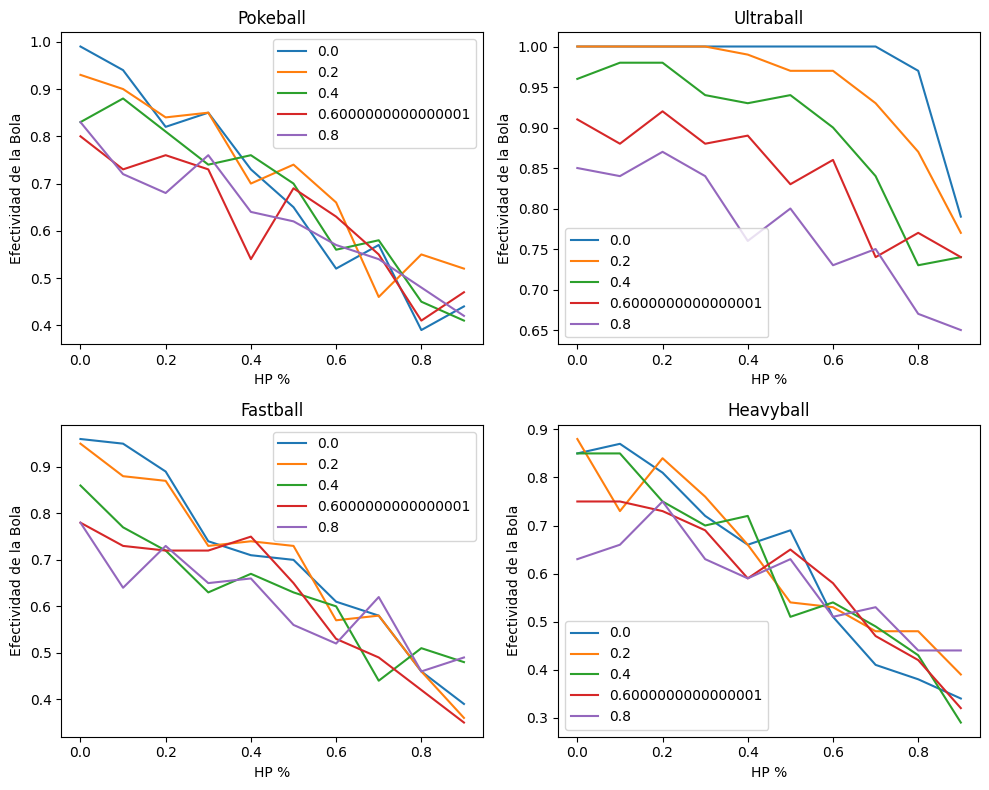

In [31]:
df = pd.DataFrame(result3g)
df.rename(columns={'Capturado_pb':'Pokeball',	'Capturado_ub':'Ultraball',	'Capturado_fb':'Fastball',	'Capturado_hb':'Heavyball'}, inplace=True)
#['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']):
    row, col = divmod(i, 2)
    for n in df['noise'].unique():
        subset = df[df['noise'] == n]
        axs[row, col].plot(subset['hp_percentage'], subset[ball_type], label=n)
    axs[row, col].set_xlabel('HP %')
    axs[row, col].set_ylabel('Efectividad de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

- - jolteon

In [32]:
#vario status y hp_percentage
pokeball_catch_rate5 = pd.DataFrame([])
status = StatusEffect

pokemon_name="jolteon"
for n in np.arange(0,1,0.2):                                            #6
    for hp in np.arange(0, 1, 0.1):                         #10
        pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, hp)       
        for _ in range(100):
            catchT1, valor1 = attempt_catch(pokemon, "pokeball",n)
            catchT2, valor2 = attempt_catch(pokemon, "ultraball",n)
            catchT3, valor3 = attempt_catch(pokemon, "fastball",n)
            catchT4, valor4 =attempt_catch(pokemon, "heavyball",n)
            new_row = {"pokemon_name": pokemon_name, "noise":n, "hp_percentage":hp, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
            pokeball_catch_rate5 = pd.concat([pokeball_catch_rate5, pd.DataFrame([new_row])], ignore_index=True)

# Filtrar las filas con valores True en las columnas de interés
capturado_columns = ['noise', 'hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
df_capturado = pokeball_catch_rate5[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
result4 = df_capturado.groupby(['noise', 'hp_percentage']).sum() / 100
#result3
pokeball_catch_rate5


,pokemon_name,noise,hp_percentage,pokeball,Capturado_pb,ultraball,Capturado_ub,fastball,Capturado_fb,heavyball,Capturado_hb
0,jolteon,0.0,0.0,0.174700,False,0.349500,False,0.698900,True,0.097100,False
1,jolteon,0.0,0.0,0.174700,False,0.349500,False,0.698900,True,0.097100,False
2,jolteon,0.0,0.0,0.174700,False,0.349500,False,0.698900,True,0.097100,False
3,jolteon,0.0,0.0,0.174700,False,0.349500,True,0.698900,True,0.097100,True
4,jolteon,0.0,0.0,0.174700,False,0.349500,False,0.698900,False,0.097100,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,jolteon,0.8,0.9,0.025727,False,0.140642,False,0.293021,False,0.028804,False
4996,jolteon,0.8,0.9,0.017325,False,0.116675,True,0.412951,False,0.057191,False
4997,jolteon,0.8,0.9,0.036852,False,0.103481,False,0.248388,False,0.022184,False
4998,jolteon,0.8,0.9,0.099577,False,0.110331,False,0.308175,True,0.037830,False


In [33]:
#para hace la grafica, restablezco los indices a columnas
result4g = result4.reset_index()
result4g

,noise,hp_percentage,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
0,0.0,0.0,0.21,0.38,0.74,0.11
1,0.0,0.1,0.18,0.34,0.66,0.11
2,0.0,0.2,0.15,0.40,0.58,0.07
3,0.0,0.3,0.18,0.44,0.59,0.06
4,0.0,0.4,0.12,0.25,0.53,0.08
5,0.0,0.5,0.08,0.23,0.35,0.08
6,0.0,0.6,0.09,0.24,0.45,0.04
7,0.0,0.7,0.07,0.21,0.33,0.04
8,0.0,0.8,0.11,0.22,0.31,0.06
9,0.0,0.9,0.06,0.14,0.21,0.00


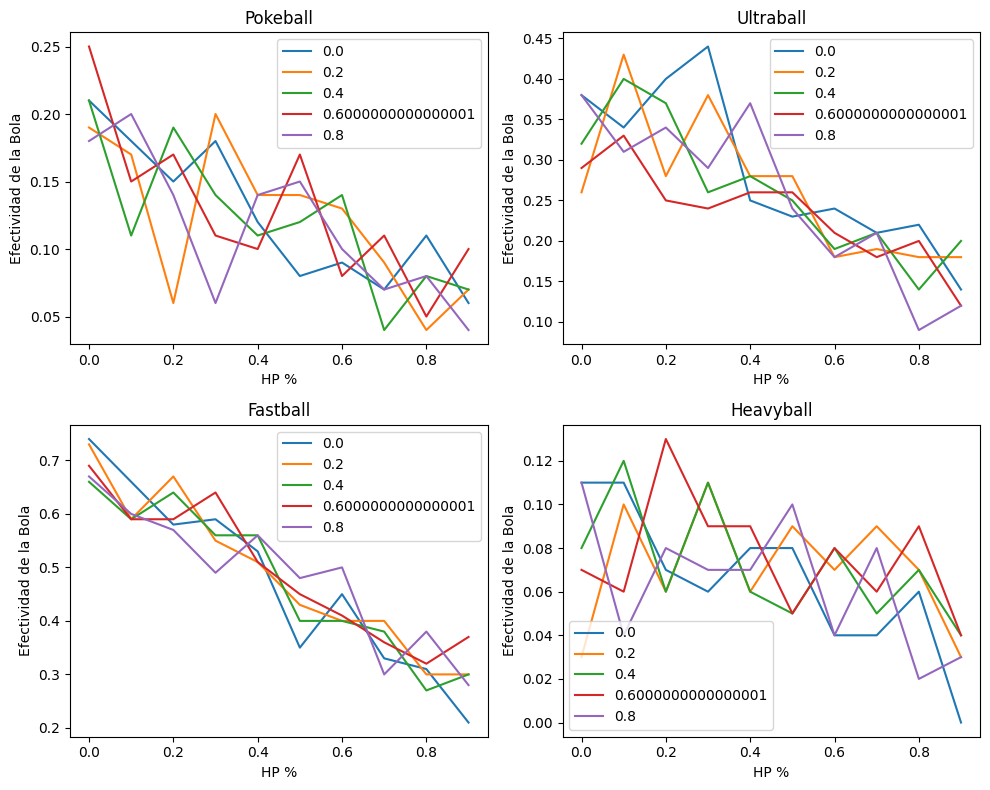

In [34]:
df = pd.DataFrame(result4g)
df.rename(columns={'Capturado_pb':'Pokeball',	'Capturado_ub':'Ultraball',	'Capturado_fb':'Fastball',	'Capturado_hb':'Heavyball'}, inplace=True)
#['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']
# Crear una matriz de 2x2 con subgráficos
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, ball_type in enumerate(['Pokeball',	'Ultraball',	'Fastball',	'Heavyball']):
    row, col = divmod(i, 2)
    for n in df['noise'].unique():
        subset = df[df['noise'] == n]
        axs[row, col].plot(subset['hp_percentage'], subset[ball_type], label=n)
    axs[row, col].set_xlabel('HP %')
    axs[row, col].set_ylabel('Efectividad de la Bola')
    axs[row, col].set_title(f'{ball_type.capitalize()}')
    axs[row, col].legend()

plt.tight_layout()
plt.show()

Seteando el valor de ruido se observa que: BLA BLA BLA BLA

- c) ¿Qué parámetros son los que más afectan la probabilidad de captura?

In [56]:
#vario status y hp_percentage
pokeball_catch_rate6 = pd.DataFrame([])
status = StatusEffect

for pokemon_name in pokemons:
    for n in np.arange(0,1,0.1):                                             #6
        for hp in np.arange(0, 1, 0.1):                         #10
            pokemon = factory.create(pokemon_name, 100, StatusEffect.NONE, hp)       
            for _ in range(1):
                catchT1, valor1 = attempt_catch(pokemon, "pokeball",n)
                catchT2, valor2 = attempt_catch(pokemon, "ultraball",n)
                catchT3, valor3 = attempt_catch(pokemon, "fastball",n)
                catchT4, valor4 =attempt_catch(pokemon, "heavyball",n)
                new_row = {"pokemon_name": pokemon_name, "noise":n, "hp_percentage":hp, "pokeball": valor1, "Capturado_pb":catchT1, "ultraball": valor2, "Capturado_ub":catchT2, "fastball": valor3, "Capturado_fb":catchT3, "heavyball": valor4,"Capturado_hb":catchT4  }
                pokeball_catch_rate6 = pd.concat([pokeball_catch_rate6, pd.DataFrame([new_row])], ignore_index=True)

# Filtrar las filas con valores True en las columnas de interés
#capturado_columns = ['status', 'hp_percentage','Capturado_pb', 'Capturado_ub', 'Capturado_fb', 'Capturado_hb']
#df_capturado = pokeball_catch_rate6[capturado_columns]

# Contar la cantidad de True por cada pokemon_name y hp_percentage
#result4 = df_capturado.groupby(['status', 'hp_percentage']).sum() / 100
#result4
pokeball_catch_rate6

,pokemon_name,noise,hp_percentage,pokeball,Capturado_pb,ultraball,Capturado_ub,fastball,Capturado_fb,heavyball,Capturado_hb
0,jolteon,0.0,0.0,0.174700,False,0.349500,False,0.698900,True,0.097100,False
1,jolteon,0.0,0.1,0.164200,False,0.328300,False,0.656700,True,0.091200,False
2,jolteon,0.0,0.2,0.152600,True,0.305100,False,0.610200,True,0.084800,False
3,jolteon,0.0,0.3,0.141000,False,0.281900,True,0.563800,True,0.078300,False
4,jolteon,0.0,0.4,0.129300,False,0.258700,False,0.517300,False,0.071900,False
...,...,...,...,...,...,...,...,...,...,...,...
495,mewtwo,0.9,0.5,0.012718,False,0.015034,False,0.047971,False,0.000000,False
496,mewtwo,0.9,0.6,0.000000,False,0.014145,False,0.010660,False,0.000000,False
497,mewtwo,0.9,0.7,0.004579,False,0.001742,False,0.004686,False,0.004866,False
498,mewtwo,0.9,0.8,0.004475,False,0.000000,False,0.048887,False,0.000000,False


In [57]:
df_pokeball = pokeball_catch_rate6[['pokemon_name','noise','hp_percentage','pokeball']]
df_pokeball

,pokemon_name,noise,hp_percentage,pokeball
0,jolteon,0.0,0.0,0.174700
1,jolteon,0.0,0.1,0.164200
2,jolteon,0.0,0.2,0.152600
3,jolteon,0.0,0.3,0.141000
4,jolteon,0.0,0.4,0.129300
...,...,...,...,...
495,mewtwo,0.9,0.5,0.012718
496,mewtwo,0.9,0.6,0.000000
497,mewtwo,0.9,0.7,0.004579
498,mewtwo,0.9,0.8,0.004475


In [73]:
dfg = pd.DataFrame(df_pokeball)

j=0
for p in pokemons:
    dfg['pokemon_name'] = dfg['pokemon_name'].replace(p, j)
    j=j+1
dfg

C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_11248\3588559764.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfg['pokemon_name'] = dfg['pokemon_name'].replace(p, j)


,pokemon_name,noise,hp_percentage,pokeball
0,0,0.0,0.0,0.174700
1,0,0.0,0.1,0.164200
2,0,0.0,0.2,0.152600
3,0,0.0,0.3,0.141000
4,0,0.0,0.4,0.129300
...,...,...,...,...
495,4,0.9,0.5,0.012718
496,4,0.9,0.6,0.000000
497,4,0.9,0.7,0.004579
498,4,0.9,0.8,0.004475


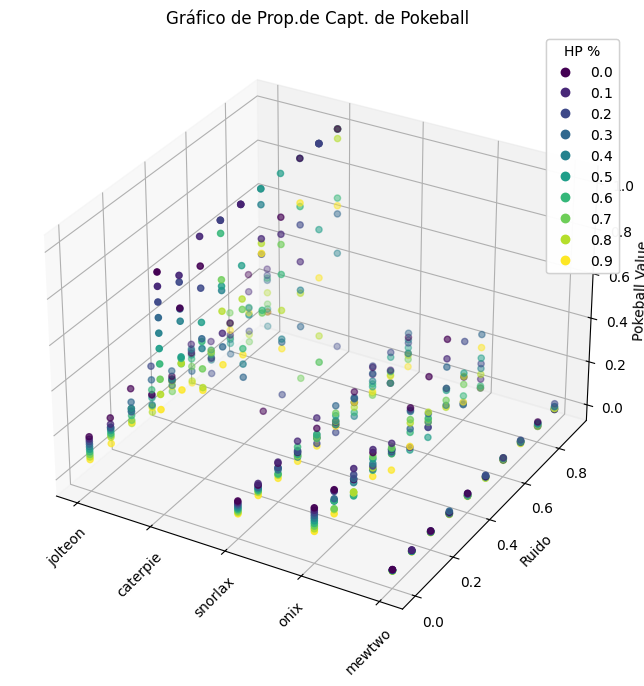

In [68]:
# Crea una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Grafica los puntos
scatter = ax.scatter(dfg['pokemon_name'], dfg['noise'], dfg['pokeball'], c=dfg['hp_percentage'], cmap='viridis')

# Configura los ejes
#ax.set_xlabel('Pokemon name')
ax.set_ylabel('Ruido')
ax.set_zlabel('Pokeball Value',labelpad=1)

ax.set_title('Gráfico de Prop.de Capt. de Pokeball')

# Configurar etiquetas de los ejes
x_labels = pokemons
#y_labels = dfg['noise'].unique()
y_labels = ['0.0','0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9']

# Agrega una leyenda para el color
legend = ax.legend(*scatter.legend_elements(), title='HP %')
ax.add_artist(legend)
# Configurar etiquetas de los ejes
ax.set_xticks(range(5))
ax.set_xticklabels(x_labels, rotation=45)
#ax.set_yticks(range(10))
#ax.set_yticklabels(y_labels)


# Muestra el gráfico
plt.show()

En el grafico de arriba comparo los diferentes parametros (de nuevo varie el status y no el noise)
Se observa lo siguiente:
BLA BLA BLA.

A continuación realizao un analisis para saber como varia cada variable en relación a la otra.
Esto es: analisis de covarianza y correlación. Enfocandome en la correlación para saber como la Probabilidad de Captura varia en relación a las demas parametros mutables.

In [74]:
dfg.rename(columns={'pokemon_name': 'Pokemon','hp_percentage':'HP %', 'pokeball':'Prop.Capt.'}, inplace=True)

In [70]:
covariance_matrix = dfg.cov()
covariance_matrix

,Pokemon,noise,HP %,Prop.Capt.
Pokemon,2.004008e+00,-2.447385e-18,2.224896e-19,-0.151159
noise,-2.447385e-18,8.266533e-02,-2.864553e-20,-0.000789
HP %,2.224896e-19,-2.864553e-20,8.266533e-02,-0.010965
Prop.Capt.,-1.511589e-01,-7.893074e-04,-1.096511e-02,0.070203


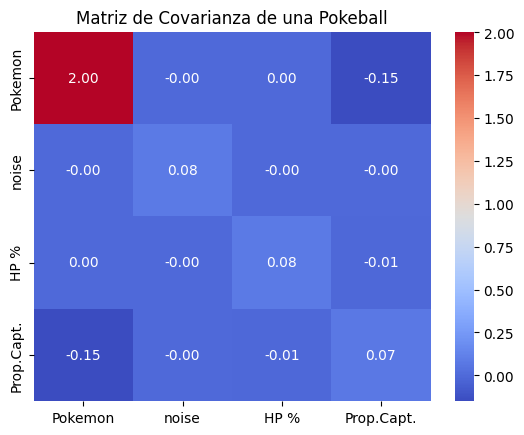

In [75]:
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Covarianza de una Pokeball')
plt.show()

In [78]:
correlation_matrix = dfg.corr()
correlation_matrix

,Pokemon,noise,HP %,Prop.Capt.
Pokemon,1.000000e+00,1.031502e-15,-2.683983e-16,-0.403001
noise,1.031502e-15,1.000000e+00,2.018587e-17,-0.010361
HP %,-2.683983e-16,2.018587e-17,1.000000e+00,-0.143937
Prop.Capt.,-4.030013e-01,-1.036113e-02,-1.439375e-01,1.000000


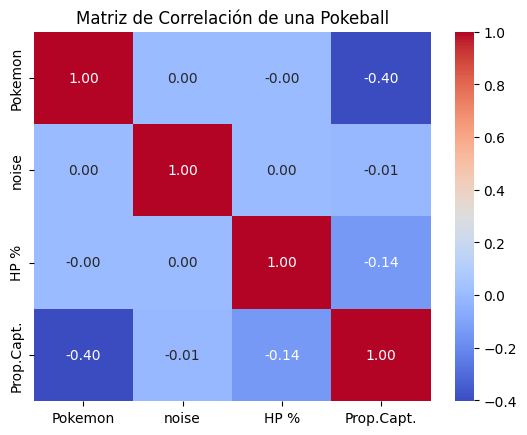

In [79]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de una Pokeball')
plt.show()

Leyendo las celdas de la fila inferior correspondiente a Prop.Capt, se observa que el mayor valor de correlación es "status".
Esto es para PokeBall

Leyendo las celdas de la fila inferior correspondiente a Prop.Capt, se observa que el mayor valor de correlación es "status".
Esto es para UltraBall

C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_11248\2255625175.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfg['pokemon_name'] = dfg['pokemon_name'].replace(p, i)


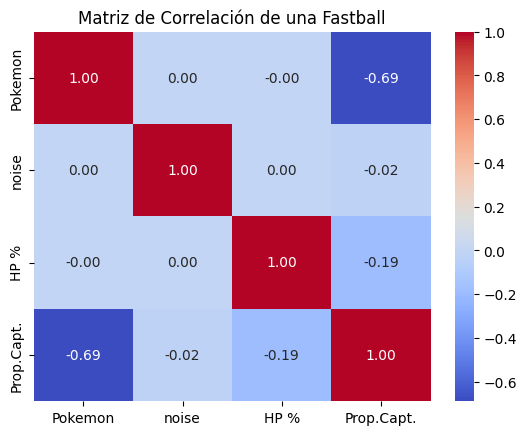

In [80]:
#PARA FASTBALL
df_fastball = pokeball_catch_rate6[['pokemon_name','noise','hp_percentage','fastball']]

dfg = pd.DataFrame(df_fastball)


i=0
for p in pokemons:
    dfg['pokemon_name'] = dfg['pokemon_name'].replace(p, i)
    i=i+1

dfg.rename(columns={'pokemon_name': 'Pokemon','hp_percentage':'HP %', 'fastball':'Prop.Capt.'}, inplace=True)

correlation_matrix = dfg.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de una Fastball')
plt.show()

Leyendo las celdas de la fila inferior correspondiente a Prop.Capt, se observa que el mayor valor de correlación es "status".
Esto es para FastBall

C:\Users\dpenaloza\AppData\Local\Temp\ipykernel_11248\2814107884.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfg['pokemon_name'] = dfg['pokemon_name'].replace(p, i)


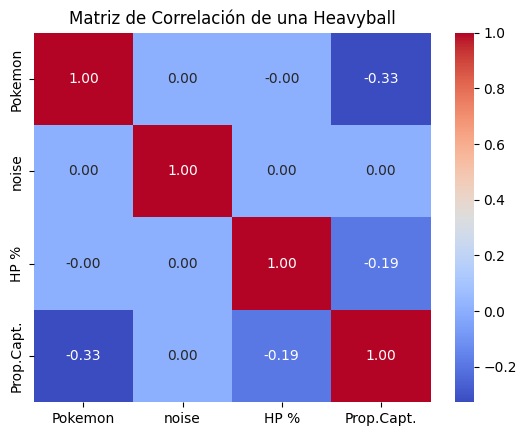

In [82]:
#PARA HEAVYBALL
df_heavyball = pokeball_catch_rate6[['pokemon_name','noise','hp_percentage','heavyball']]

dfg = pd.DataFrame(df_heavyball)

i=0
for p in pokemons:
    dfg['pokemon_name'] = dfg['pokemon_name'].replace(p, i)
    i=i+1

dfg.rename(columns={'pokemon_name': 'Pokemon','hp_percentage':'HP %', 'heavyball':'Prop.Capt.'}, inplace=True)

correlation_matrix = dfg.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación de una Heavyball')
plt.show()

Leyendo las celdas de la fila inferior correspondiente a Prop.Capt, se observa que el mayor valor de correlación es "status".
Esto es para HeavyBall.

- d) Teniendo en cuenta uno o dos pokemones distintos: ¿Qué combinación de condiciones (propiedades mutables) y pokebola conviene utilizar para capturarlos?

Recordando cual parametros son mutables y cuales no:
-                no mutable     name: str,
-                no mutable     type: Tuple[Type, Type],        # Especie
*                mutable        current_hp : int,               # Vida actual    *
*                mutable        status_effect : StatusEffect,   # Condición de salud
*                mutable        level : int,                    # Nivel de experiencia
-                no mutable     stats: Stats,                   # [base hp, attack, defense, Sp. attack, Sp. defense, speed]
-                no mutable     catch_rate: int,                # Dificultad de captura. (Min: 0, Max: 259
-                no mutable     weight: float,                  # Peso

Lo que vi leyendo el codigo, es que: el level no afecta a la probibildad / efectividad de captura. ¿ O estoy equivocado ?

In [83]:
conteo_por_pokemon_t = conteo_por_pokemon.reset_index()
conteo_por_pokemon_t


,pokemon_name,Capturado_pb,Capturado_ub,Capturado_fb,Capturado_hb
0,caterpie,0.37,0.66,0.30,0.30
1,jolteon,0.06,0.14,0.22,0.02
2,mewtwo,0.01,0.00,0.04,0.00
3,onix,0.09,0.16,0.05,0.13
4,snorlax,0.02,0.08,0.02,0.10


- e) A partir del punto anterior, ¿sería efectiva otra combinación de parámetros teniendo en cuenta un nivel del pokemon más bajo (o más alto)?